In [81]:
%matplotlib inline
import os
import pickle
import matplotlib.pyplot as plt
import openslide
import pandas as pd

filename = 'QUERY_RESULTS/all/results.pkl'
with open(filename, 'rb') as handle: 
    b = pickle.load(handle) 

slide_path= '/mnt/storage/COMET/RAW/'

MIN_SITE_COUNT=5

diag_dict = {'Spindle': 'RMS_S', 'ARMS': 'RMS_A', 'ERMS': 'RMS_E'}

metadata_fn = '/home/blansdell/projects/comet/comet_rms/raw/RMS_samples_083121.csv'
metadata = pd.read_csv(metadata_fn, header = 2).iloc[:,:21]
metadata = metadata[pd.notnull(metadata['Slide Scan File'])][['Slide Scan File', 'Site', 'Subtype (Corrected)']]
metadata = metadata.rename(columns = {'Slide Scan File': 'slideid', 'Site': 'site', 'Subtype (Corrected)': 'diagnosis'})
metadata['slideid'] = metadata['slideid'].apply(lambda x: str(int(x))+'_')
metadata['diagnosis'] = metadata['diagnosis'].apply(lambda x: diag_dict[x] if x in diag_dict else pd.NA)
metadata['site'] = metadata['site'].apply(lambda x: str(x).lower().split(' ')[0])
metadata = metadata[pd.notnull(metadata['diagnosis'])]
populated_sites = metadata['site'].value_counts()
populated_sites = list(populated_sites[populated_sites >= MIN_SITE_COUNT].index)
metadata = metadata[metadata['site'].isin(populated_sites)]
metadata.loc[metadata.slideid == '6250_', 'site']

167    lymph
Name: site, dtype: object

In [86]:
metadata.loc[metadata.slideid == '6250_', 'site'].values[0]

'lymph'

In [89]:
def plot_slide(sn):
    qs = openslide.OpenSlide(slide_path + sn + '.svs')
    qst = qs.get_thumbnail([500, 500])
    fig, ax = plt.subplots(1,1)
    ax.imshow(qst)
    
def plot_slides(q_slide, h_slides):
    N = len(h_slides)
    qs = openslide.OpenSlide(slide_path + q_slide + '.svs')
    qst = qs.get_thumbnail([500, 500])
    fig, ax = plt.subplots(1,N+1, figsize = (20,10))
    q_site = metadata.loc[metadata.slideid == q_slide, 'site'].values[0]
    q_diag = metadata.loc[metadata.slideid == q_slide, 'diagnosis'].values[0]
    ax[0].imshow(qst)
    ax[0].set_title(f"Query: {q_slide}, site: {q_site}, diag: {q_diag}")
    ax[0].axis('off')
    for idx, hs in enumerate(h_slides):
        qs = openslide.OpenSlide(slide_path + hs + '.svs')
        h_site = metadata.loc[metadata.slideid == hs, 'site'].values[0]
        h_diag = metadata.loc[metadata.slideid == hs, 'diagnosis'].values[0]
        qst = qs.get_thumbnail([500, 500])
        ax[idx+1].imshow(qst)
        ax[idx+1].set_title(f"Hit: {hs}, site: {h_site}, diag: {h_diag}")
        ax[idx+1].axis('off')

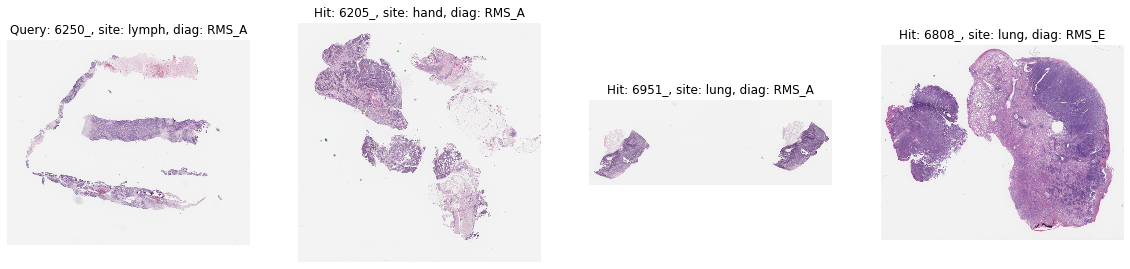

In [90]:
query_slide = '6250_'
hit_slides = ['6205_', '6951_', '6808_', '6211_', '6960_'][:3]
plot_slides(query_slide, hit_slides)

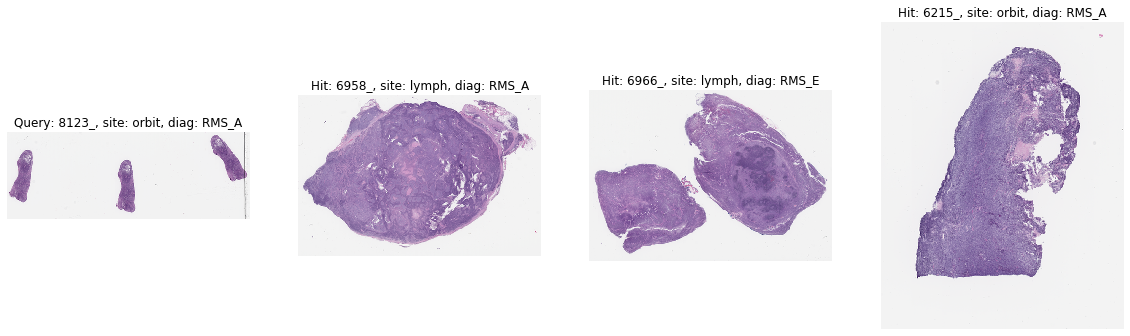

In [91]:
query_slide = '8123_'
hit_slides = ['6958_', '6966_', '6215_', '6234_', '8129_'][:3]
plot_slides(query_slide, hit_slides)

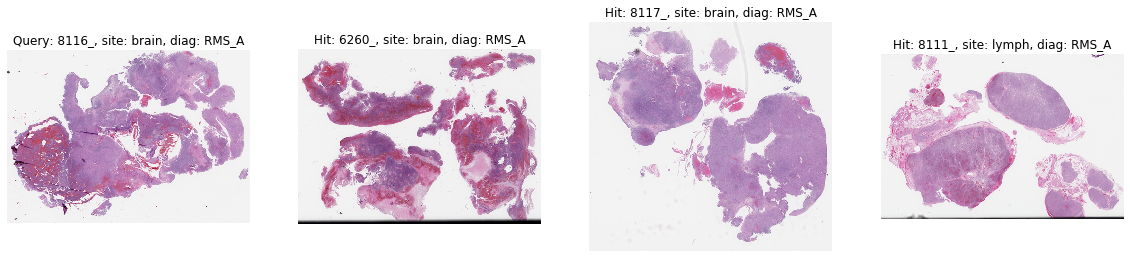

In [92]:
query_slide = '8116_'
hit_slides = ['6260_', '8117_', '8111_', '6227_', '6808_'][:3]
plot_slides(query_slide, hit_slides)

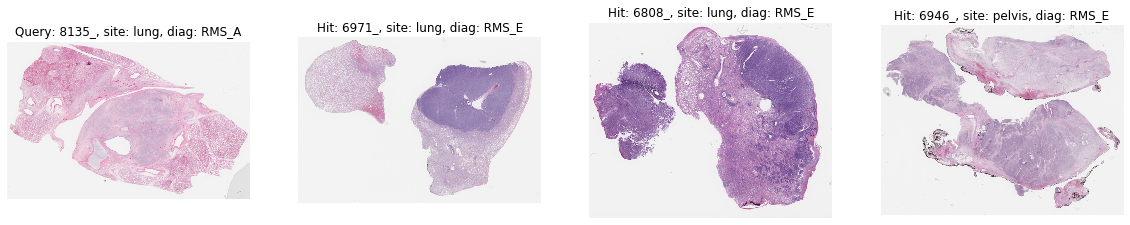

In [93]:
query_slide = '8135_'
hit_slides = ['6971_', '6808_', '6946_', '6982_', '8102_'][:3]
plot_slides(query_slide, hit_slides)

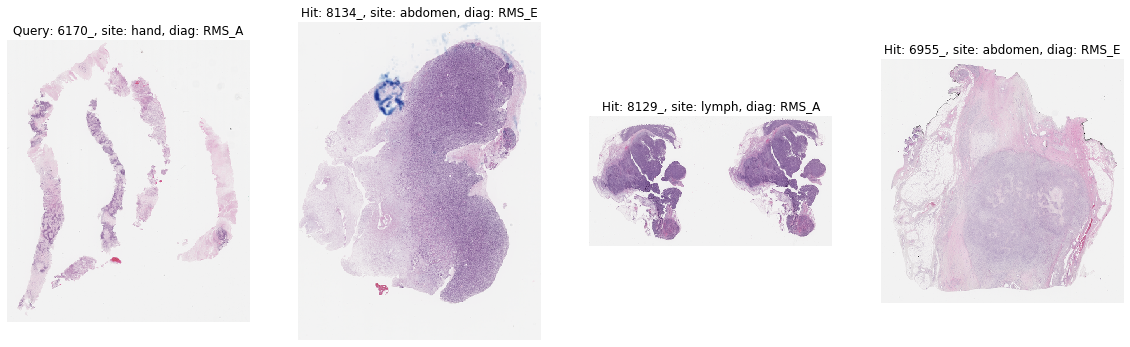

In [94]:
query_slide = '6170_'
hit_slides = ['8134_', '8129_', '6955_', '6212_', '8137_'][:3]
plot_slides(query_slide, hit_slides)

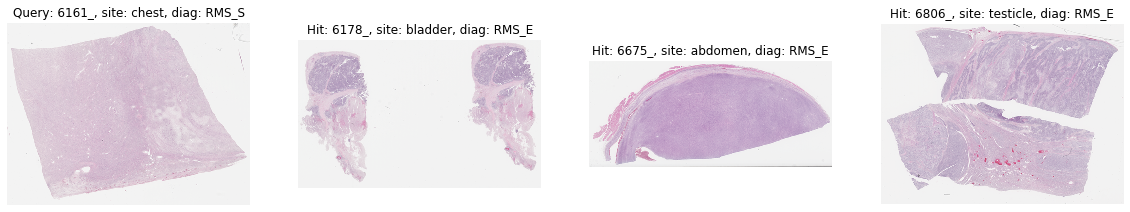

In [95]:
query_slide = '6161_'
hit_slides = ['6178_', '6675_', '6806_', '8109_', '6982_'][:3]
plot_slides(query_slide, hit_slides)

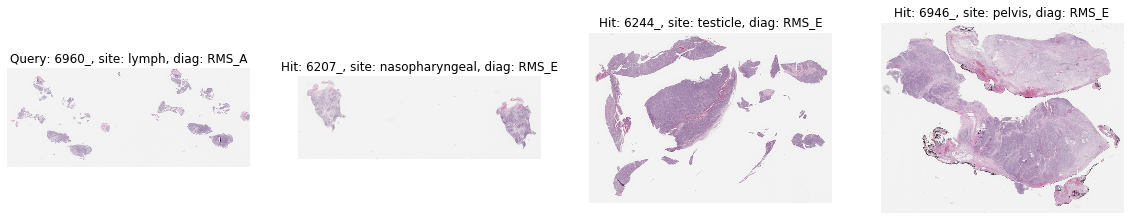

In [96]:
query_slide = '6960_'
hit_slides = ['6207_', '6244_', '6946_', '6970_', '8085_'][:3]
plot_slides(query_slide, hit_slides)